import time
plc=1
time.sleep(3000*plc)         #run after 1 houre = 3600 seconds

In [1]:
import os
import glob
import scipy
import random
import bisect
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from preprocess import *                         #ماژول استخراج پنجره ها
from data import *                          #ماژول محلی ورود داده ها
from augment import *                            #ماژول های داده افزایی
from lstm_cnn import *                           #ماژول های داده افزایی با lstm_cnn
import augment
import importlib
importlib.reload(augment)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Conv1D,Dropout,MaxPooling1D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
cwd = os.getcwd() #
fullscrn()

<h1><center><div style="direction:rtl;font-family:B Nazanin">Importing Data</div></center></h1>

In [2]:
rate=480
cls_num=2
btch=20
for i in range (0,cls_num):
    vars()['ecg'+str(i)],vars()['ecg_tst'+str(i)]=MiddlePhalanxOutlineCorrect(i)

os.chdir(cwd)
clses_lens=np.array([])
i=0                               #جمع آوری داده ها و چاپ تعداد نمونه ی هر کلاس
ecg=np.array(ecg0)
print(0,len(vars()['ecg'+str(0)]), end='\t')
clses_lens=np.append(clses_lens,len(vars()['ecg'+str(0)]))
for i in range (1,cls_num):
    ecg=np.concatenate((ecg,vars()['ecg'+str(i)]),axis=0)
    clses_lens=np.append(clses_lens,len(vars()['ecg'+str(i)]))
    print(i,len(vars()['ecg'+str(i)]), end='\t')

mx_sig=max(clses_lens)

first_train_shape= (291, 81)
first_test_shape= (600, 81)
classes_quantity= 2
tr_lbls=	 {0, 1}
Count_labels= [166]
max(train_feature_Altitude)= 1.8756
min(train_feature_Altitude)= -1.7195
first_train_sample=
 [ 0.       -0.7065   -0.65997  -0.47379  -0.22616   0.10006   0.39363
  0.69603   0.98459   1.1738    1.4781    1.4308    1.3673    1.4243
  1.5021    1.4319    1.1978    0.98944   0.80072   0.53166   0.23594
 -0.058043 -0.30808  -0.55961  -0.68329  -0.66936  -0.51165  -0.31784
 -0.076799  0.19995   0.44881   0.75216   1.0404    1.3203    1.5863
  1.6022    1.377     1.3586    1.3593    1.3325    1.2374    1.2954
  1.4635    1.3819    1.0603    0.75858   0.44207   0.14705  -0.14366
 -0.3966   -0.58665  -0.49186  -0.50286  -0.62594  -0.72812  -0.88656
 -1.0317   -1.1653   -1.3105   -1.4478   -1.3864   -1.2248   -1.0622
 -0.90622  -0.78891  -0.65143  -0.58693  -0.65616  -0.8165   -0.97518
 -1.1302   -1.2435   -1.2487   -1.2692   -1.3553   -1.332    -1.2132
 -1.1004   -0.95834  -0.795

In [3]:
np.shape(ecg)

(291, 481)

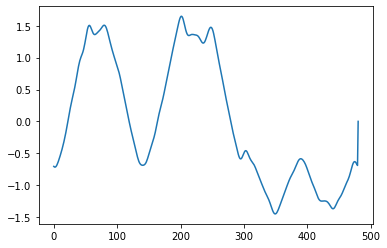

In [4]:
plt.plot(ecg[0])

In [4]:
ecg[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

<h2><center><div style="direction:rtl;font-family:B Nazanin">Base Train windows</div></center></h1>

In [5]:
smpl_rte=rate                                              # در ماژول ها نیز همین مقدار ثبت شده
i=0
windws=np.array([])

for cls in range (0,cls_num):                                 #ساخت پنجره های داده های آموزش اصلی
    vars()['wndws'+str(cls)]=np.array(vars()['ecg'+str(cls)])  
    
print("each class and its windows =")

cls_wndws=np.array([])
for cls in range (0,cls_num):                                # آرایه ی تعداد پنجره ی هر کلاس
    wns=len(vars()['wndws'+str(cls)])
    cls_wndws=np.append(cls_wndws,wns)
    print(cls, wns, end='\t')

mx_wndws=int(np.max(cls_wndws))                        # حداکثر تعداد پنجره ی موجود بین کلاس ها
print('\n max =', mx_wndws)

each class and its windows =
0 125	1 166	
 max = 166


<h1><center><div style="direction:rtl;font-family:B Nazanin">Data Augmentation</div></center></h1>

In [6]:
smpl_rte=len(wndws1[0])                                        # در ماژول ها نیز همین مقدار ثبت شده

#add augmented data to base data
xtrain=np.empty((0,len(wndws1[0])), float) 
for i in range (0,cls_num):   
    xtrain=np.append(xtrain,vars()['wndws'+str(i)],axis=0)
    print('Up to class ', i, 'train shape = ', np.shape(xtrain))

Up to class  0 train shape =  (125, 481)
Up to class  1 train shape =  (291, 481)


In [7]:
print(np.bincount(np.int16(xtrain[:,-1])))    #تعداد پنجره در هر کلاس از 0 تا 17

[125 166]


In [8]:
xtrain[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
mx_aug=np.max(xtrain[:,:-1])
mx=np.max(ecg[:,:-1])
mn_aug=np.min(xtrain[:,:-1])
mn=np.min(ecg[:,:-1])

#for i in range (0,cls_num):             #نرمالسازی داده های افزایشی
xtrain[:,:-1]= 2*(xtrain[:,:-1]-mn_aug)/(mx_aug - mn_aug) - 1

In [10]:
print('min trn =', np.min(xtrain[:,:-1]))
print('max trn =', np.max(xtrain[:,:-1]))

min trn = -1.0
max trn = 1.0


<h3><center><div style="direction:rtl;font-family:B Nazanin">Test Windows</div></center></h1>

In [11]:
wndws_test=np.empty((0,len(wndws1[0])), float)
i=0
windws=np.array([])
for cls in range (0,cls_num):                                 #ساخت پنجره های داده های آموزش اصلی
    vars()['wndws_tst'+str(cls)]=np.empty((0,len(wndws1[0])), float)
    vars()['wndws_tst'+str(cls)]=np.append(vars()['wndws_tst'+str(cls)],vars()['ecg_tst'+str(cls)],axis=0)   

In [12]:
#print(np.max(wndws_tst))
for i in range (0,cls_num):                # Normalization test windows
    cls=i
    print('\n cls', i, ' >> ')
    print('max magnitude class', i , ' = ' ,np.max(vars()['wndws_tst'+str(cls)][:,:-1]))
    print('min magnitude class', i , ' = ' ,np.min(vars()['wndws_tst'+str(cls)][:,:-1]))

    vars()['wndws_tst'+str(i)][:,:-1]= 2*(vars()['wndws_tst'+str(i)][:,:-1]-mn_aug)/(mx_aug - mn_aug) - 1
    
    print('after normalizing >>')
    print('max magnitude class', i , ' = ' ,np.max(vars()['wndws_tst'+str(cls)][:,:-1]))
    print('min magnitude class', i , ' = ' ,np.min(vars()['wndws_tst'+str(cls)][:,:-1]))
    
print("each class and its windows =")                    #تجمیع کلاس های تست
cls_wndws=np.array([])
for cls in range (0,cls_num):                                # آرایه ی تعداد پنجره ی هر کلاس
    wns=len(vars()['wndws_tst'+str(cls)])
    cls_wndws=np.append(cls_wndws,wns)
    print(cls, wns, end='\t')
    wndws_test=np.append(wndws_test,vars()['wndws_tst'+str(cls)],axis=0)
    
mx_wndws=int(np.max(cls_wndws))                        # حداکثر تعداد پنجره ی موجود بین کلاس ها
print('\n max instance in classes of test windows =', mx_wndws)


 cls 0  >> 
max magnitude class 0  =  2.072583183149495
min magnitude class 0  =  -1.6939263958932065
after normalizing >>
max magnitude class 0  =  1.1016146975829342
min magnitude class 0  =  -0.9816839335302111

 cls 1  >> 
max magnitude class 1  =  1.9305638381922492
min magnitude class 1  =  -1.651088332578463
after normalizing >>
max magnitude class 1  =  1.0230622073444215
min magnitude class 1  =  -0.9579897209468395
each class and its windows =
0 212	1 388	
 max instance in classes of test windows = 388


In [13]:
print('min tst =', np.min(wndws_test[:,:-1]))
print('max tst =', np.max(wndws_test[:,:-1]))

min tst = -0.9816839335302111
max tst = 1.1016146975829342


In [14]:
len(wndws_test)

600

In [15]:
np.shape(wndws_test)

(600, 481)

In [16]:
Xtest=wndws_test[:,:-1]
ytest=np.int16(wndws_test[:,-1])

In [17]:
fullprint(ytest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<h3><center><div style="direction:rtl;font-family:B Nazanin">Train Windows</div></center></h1>

In [18]:
#ytraint=np.int32(np.array([ytrain]).T)
#trainx=np.concatenate((Xtrain, ytraint), axis=1)
trainx=np.random.permutation(xtrain)
Xtrain=np.array(trainx[:,:-1])
ytrain=np.int16(trainx[:,-1])
'''
ytestt=np.int32(np.array([ytest]).T)
testx=np.concatenate((Xtest, ytestt), axis=1)
testx=np.random.permutation(testx)
Xtest=np.int32(testx[:,:-1])
ytest=np.int32(testx[:,-1])'''

'\nytestt=np.int32(np.array([ytest]).T)\ntestx=np.concatenate((Xtest, ytestt), axis=1)\ntestx=np.random.permutation(testx)\nXtest=np.int32(testx[:,:-1])\nytest=np.int32(testx[:,-1])'

In [19]:
np.shape(wndws1)

(166, 481)

<h3><center><div style="direction:rtl;font-family:B Nazanin">Validation Windows</div></center></h1>

In [20]:
Xvalid=np.array(Xtrain)
yvalid=np.array(ytrain)

<h1><center><div style="direction:rtl;font-family:B Nazanin">CNN And UnBalanced RAW Data</div></center></h1>
<h1><center><div style="direction:rtl;font-family:Arial">Cross Entropy Loss Function</div></center></h1>

In [21]:
X_train=np.array(Xtrain)
y_train=np.array(ytrain)
X_test=np.array(Xtest)
y_test=np.array(ytest)
X_valid=np.array(Xtrain)
y_valid=np.array(ytrain)
print('X_train => ', X_train.shape)
print('y_train => ', y_train.shape)
print('X_test  => ', X_test.shape)
print('y_test  => ', y_test.shape)
print('X_valid  => ', X_valid.shape)
print('y_valid  => ', y_valid.shape)

X_train =>  (291, 480)
y_train =>  (291,)
X_test  =>  (600, 480)
y_test  =>  (600,)
X_valid  =>  (291, 480)
y_valid  =>  (291,)


In [22]:
y_train=np.array(y_train+1)
y_test=np.array(y_test+1)
y_valid=np.array(y_valid+1)

In [23]:
y_train_cat=to_categorical(y_train)
y_valid_cat=to_categorical(y_valid)
y_test_cat=to_categorical(y_test)


X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)
X_test = np.expand_dims(X_test, axis=2)
#y_train=np.transpose([y_train])

In [24]:
accuracy=0
acc_crs=np.array([])
##for i in range (10):
##    if accuracy<0.2 :

verbose, epochs, batch_size = 1, 1000, btch
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_cat.shape[1]
steps_per_epoch = len(X_train)//batch_size
validation_steps = len(X_valid)//batch_size # if you have test data

model_crs = Sequential()
BatchNormalization()
model_crs.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model_crs.add(Dropout(0.5))
model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
'''model_crs.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
model_crs.add(Conv1D(filters=1024, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
'''
model_crs.add(Flatten())
#model_crs.add(Dropout(0.5))
model_crs.add(Dense(2000, activation='relu'))
model_crs.add(Dense(n_outputs, activation='softmax'))
model_crs.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# fit network   #CategoricalCrossentropy #sparse_categorical_crossentropy #SparseCategoricalCrossentropy

earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", mode ="max", patience = 20, restore_best_weights = True)

model_crs.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data = (X_valid, y_valid_cat), callbacks =[earlystopping])
# evaluate model_crs
_, accuracy = model_crs.evaluate(X_valid, y_valid_cat, batch_size=batch_size, verbose=1)

print('np.shape(X_test)=',np.shape(X_test))


model_crs.summary()
print('Accuracy= ', accuracy)

#output = K.function([model_crs.layers[0].input],[model_crs.layers[3].output])
#output(X_test)[0]
#y_pred= model_crs.predict(X_test)                # Function 1

##    print('Round ', i, '==>', 'accuracy = ', accuracy)
##    acc_crs=np.append(acc_crs,accuracy)
#y_pred_crs = model_crs.predict_classes(X_test)   # Function 2

Epoch 1/1000
15/15 [==============================] - 3s 33ms/step - loss: 0.8082 - accuracy: 0.5155 - val_loss: 0.7566 - val_accuracy: 0.4296
Epoch 2/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.7079 - accuracy: 0.5155 - val_loss: 0.7349 - val_accuracy: 0.4296
Epoch 3/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.7167 - accuracy: 0.5155 - val_loss: 0.6740 - val_accuracy: 0.5704
Epoch 4/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.6764 - accuracy: 0.5979 - val_loss: 0.6518 - val_accuracy: 0.5739
Epoch 5/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6618 - accuracy: 0.6632 - val_loss: 0.6525 - val_accuracy: 0.5945
Epoch 6/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6456 - accuracy: 0.7010 - val_loss: 0.5617 - val_accuracy: 0.7526
Epoch 7/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.5877 - accuracy: 0.7045 - val_loss: 0.6198 - val_accuracy: 0.6804

Epoch 58/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.2403 - accuracy: 0.9107 - val_loss: 0.1565 - val_accuracy: 0.9381
Epoch 59/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.2199 - accuracy: 0.9038 - val_loss: 0.1872 - val_accuracy: 0.9313
Epoch 60/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.2254 - accuracy: 0.8969 - val_loss: 0.2524 - val_accuracy: 0.8866
Epoch 61/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.2273 - accuracy: 0.9141 - val_loss: 0.3364 - val_accuracy: 0.8282
Epoch 62/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.2554 - accuracy: 0.8729 - val_loss: 0.4249 - val_accuracy: 0.8385
Epoch 63/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.2232 - accuracy: 0.9107 - val_loss: 0.2265 - val_accuracy: 0.8866
Epoch 64/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.2108 - accuracy: 0.9003 - val_loss: 0.2194 - val_accuracy:

Epoch 115/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.0765 - accuracy: 0.9656 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 116/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.0308 - accuracy: 0.9931 - val_loss: 0.3012 - val_accuracy: 0.8832
Epoch 117/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.1241 - accuracy: 0.9588 - val_loss: 0.2747 - val_accuracy: 0.9175
Epoch 118/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0762 - accuracy: 0.9725 - val_loss: 0.0611 - val_accuracy: 0.9622
Epoch 119/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.1338 - accuracy: 0.9485 - val_loss: 0.1110 - val_accuracy: 0.9588
Epoch 120/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.0594 - accuracy: 0.9828 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 121/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0861 - accuracy: 0.9794 - val_loss: 0.1057 - val_ac

In [25]:
def maxindx(ar):
    ar_cpy=np.array(ar)
    pred=np.argmax(ar,axis=1)
    for i in range (len(pred)):
        if pred[i]==0:
            ar_cpy[i,0]=-1000
    pred=np.argmax(ar_cpy,axis=1)
    return(pred)

In [26]:
predict_x=model_crs.predict(X_test)              # Function 1

y_pred_crs=maxindx(predict_x)                    # function from augment.py to remove 0 index predictions

#y_pred_crs = model_crs.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred_crs)
fullprint(cm)
acc3=accuracy_score(y_test, y_pred_crs)

print(classification_report(y_test, y_pred_crs))

#sns.heatmap(cm, annot=True)

#plt.imshow(cm)

19/19 [==============================] - 0s 5ms/step
array([[146,  66],
       [100, 288]], dtype=int64)
              precision    recall  f1-score   support

           1       0.59      0.69      0.64       212
           2       0.81      0.74      0.78       388

    accuracy                           0.72       600
   macro avg       0.70      0.72      0.71       600
weighted avg       0.74      0.72      0.73       600



In [27]:
accuracy=0
acc_crs=np.array([])
##for i in range (10):
##    if accuracy<0.2 :

verbose, epochs, batch_size = 1, 1000, btch
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_cat.shape[1]
steps_per_epoch = len(X_train)//batch_size
validation_steps = len(X_valid)//batch_size # if you have test data

model_crs = Sequential()
BatchNormalization()
model_crs.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#model_crs.add(Dropout(0.5))
model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
BatchNormalization()
model_crs.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
'''model_crs.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
model_crs.add(Conv1D(filters=1024, kernel_size=3, activation='relu'))
model_crs.add(MaxPooling1D(pool_size=3))
'''
model_crs.add(Flatten())
#model_crs.add(Dropout(0.5))
model_crs.add(Dense(2000, activation='relu'))
model_crs.add(Dense(n_outputs, activation='softmax'))
model_crs.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# fit network   #CategoricalCrossentropy #sparse_categorical_crossentropy #SparseCategoricalCrossentropy

earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", mode ="max", patience = 20, restore_best_weights = True)

model_crs.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data = (X_valid, y_valid_cat), callbacks =[earlystopping])
# evaluate model_crs
_, accuracy = model_crs.evaluate(X_valid, y_valid_cat, batch_size=batch_size, verbose=1)

print('np.shape(X_test)=',np.shape(X_test))


model_crs.summary()
print('Accuracy= ', accuracy)

#output = K.function([model_crs.layers[0].input],[model_crs.layers[3].output])
#output(X_test)[0]
#y_pred= model_crs.predict(X_test)                # Function 1

##    print('Round ', i, '==>', 'accuracy = ', accuracy)
##    acc_crs=np.append(acc_crs,accuracy)
#y_pred_crs = model_crs.predict_classes(X_test)   # Function 2

Epoch 1/1000
15/15 [==============================] - 1s 39ms/step - loss: 0.8585 - accuracy: 0.5464 - val_loss: 0.6889 - val_accuracy: 0.5704
Epoch 2/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.7136 - accuracy: 0.5704 - val_loss: 0.6845 - val_accuracy: 0.5704
Epoch 3/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.7106 - accuracy: 0.5120 - val_loss: 0.6858 - val_accuracy: 0.5704
Epoch 4/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6947 - accuracy: 0.5636 - val_loss: 0.6802 - val_accuracy: 0.5704
Epoch 5/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.6902 - accuracy: 0.5223 - val_loss: 0.6753 - val_accuracy: 0.6048
Epoch 6/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.7027 - accuracy: 0.5739 - val_loss: 0.6526 - val_accuracy: 0.6117
Epoch 7/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6576 - accuracy: 0.6117 - val_loss: 0.6581 - val_accuracy: 0.5808

Epoch 58/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.2876 - accuracy: 0.8488 - val_loss: 0.1579 - val_accuracy: 0.9313
Epoch 59/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.2191 - accuracy: 0.9141 - val_loss: 0.2325 - val_accuracy: 0.8832
Epoch 60/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.2831 - accuracy: 0.8763 - val_loss: 0.1851 - val_accuracy: 0.9141
Epoch 61/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.2087 - accuracy: 0.9072 - val_loss: 0.4396 - val_accuracy: 0.8591
Epoch 62/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.3181 - accuracy: 0.8694 - val_loss: 0.2630 - val_accuracy: 0.8832
Epoch 63/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.2091 - accuracy: 0.9072 - val_loss: 0.6910 - val_accuracy: 0.6564
Epoch 64/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.2679 - accuracy: 0.8729 - val_loss: 0.4138 - val_accuracy:

                                                                 
 conv1d_7 (Conv1D)           (None, 156, 256)          98560     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 52, 256)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 50, 256)           196864    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 16, 256)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 14, 512)           393728    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 4, 512)           0         
 1D)                                                             
          

In [28]:
predict_x=model_crs.predict(X_test)              # Function 1

y_pred_crs=maxindx(predict_x)                    # function from augment.py to remove 0 index predictions

#y_pred_crs = model_crs.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred_crs)
fullprint(cm)
acc3=accuracy_score(y_test, y_pred_crs)

print(classification_report(y_test, y_pred_crs))

#sns.heatmap(cm, annot=True)

#plt.imshow(cm)

19/19 [==============================] - 0s 7ms/step
array([[157,  55],
       [ 87, 301]], dtype=int64)
              precision    recall  f1-score   support

           1       0.64      0.74      0.69       212
           2       0.85      0.78      0.81       388

    accuracy                           0.76       600
   macro avg       0.74      0.76      0.75       600
weighted avg       0.77      0.76      0.77       600

